# Importando biblioteca e dados

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.cluster import KMeans

In [2]:
pokemon = pd.read_csv("Pokemon.csv")

In [3]:
pokemon

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


# Analisando os dados

<AxesSubplot:xlabel='Generation', ylabel='count'>

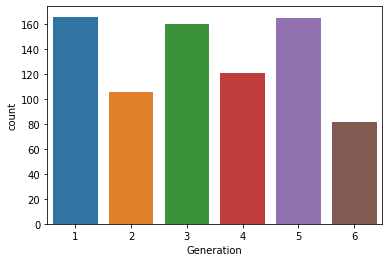

In [4]:
sns.countplot(x = 'Generation', data = pokemon)

<AxesSubplot:xlabel='Type 1', ylabel='count'>

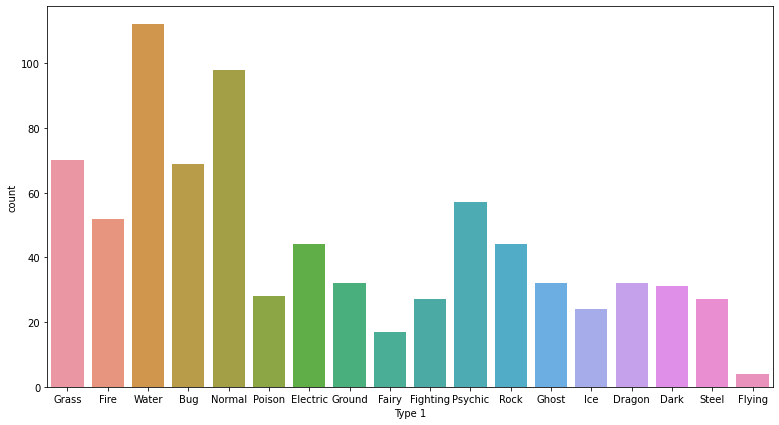

In [5]:
plt.figure(figsize=(13,7))
sns.countplot(x = 'Type 1', data = pokemon)

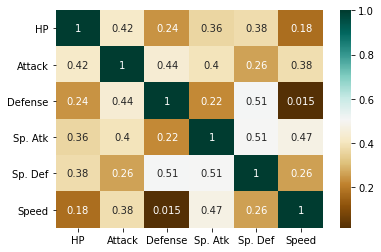

In [6]:
g = sns.heatmap(pokemon[["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]].corr(),cmap="BrBG",annot=True)

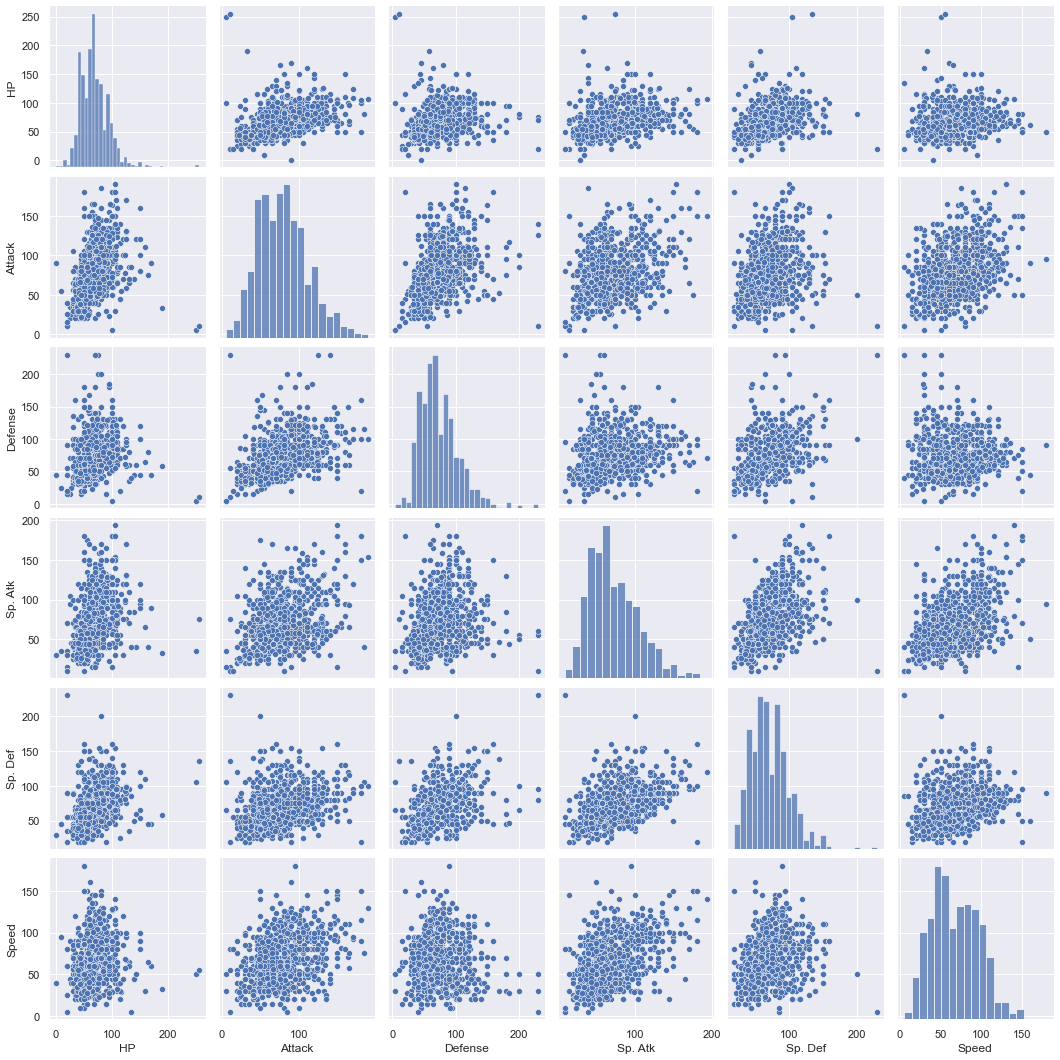

In [7]:
sns.set()
cols = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
sns.pairplot(pokemon[cols], height = 2.5)
plt.show();

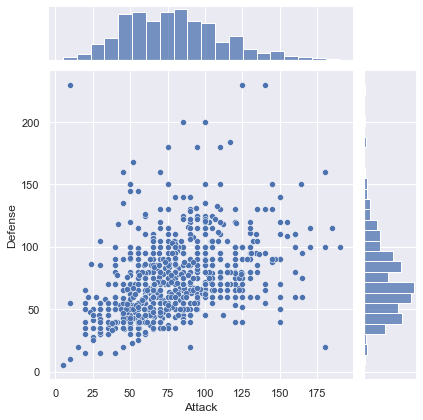

In [8]:
sns.jointplot(x = 'Attack', y = 'Defense', data = pokemon)

<AxesSubplot:xlabel='Type 1', ylabel='HP'>

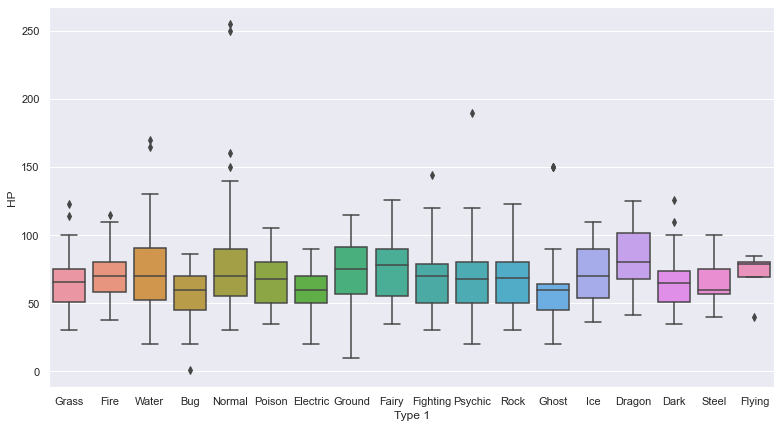

In [9]:
plt.figure(figsize=(13,7))
sns.boxplot(x = 'Type 1', y = 'HP', data = pokemon)

<AxesSubplot:xlabel='Type 1', ylabel='Attack'>

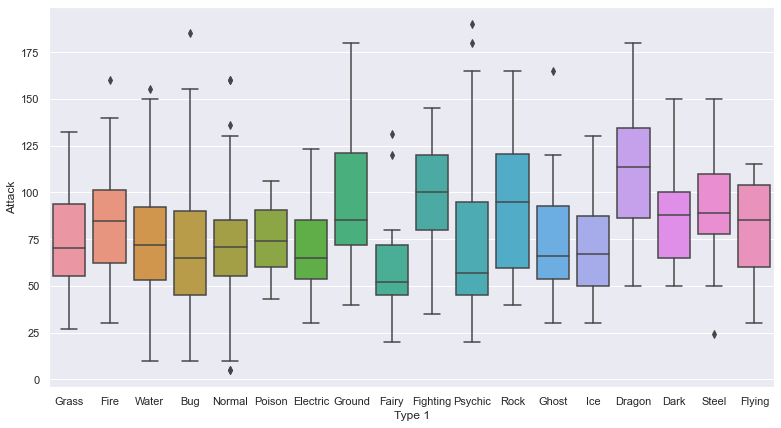

In [10]:
plt.figure(figsize=(13,7))
sns.boxplot(x = 'Type 1', y = 'Attack', data = pokemon)

# Criando heatmap dos atributos pokemons

### Agrupando pelo tipo pokemon e calculando as médias dos atributos

In [11]:
matrix1 = pokemon.groupby(['Type 1']).mean().sort_values('Total', ascending=False)
matrix1

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Type 1,,,,,,,,,,
Dragon,474.375000,550.531250,83.312500,112.125000,86.375000,96.843750,88.843750,83.031250,3.875000,0.375000
Steel,442.851852,487.703704,65.222222,92.703704,126.370370,67.518519,80.629630,55.259259,3.851852,0.148148
Flying,677.750000,485.000000,70.750000,78.750000,66.250000,94.250000,72.500000,102.500000,5.500000,0.500000
Psychic,380.807018,475.947368,70.631579,71.456140,67.684211,98.403509,86.280702,81.491228,3.385965,0.245614
Fire,327.403846,458.076923,69.903846,84.769231,67.769231,88.980769,72.211538,74.442308,3.211538,0.096154
Rock,392.727273,453.750000,65.363636,92.863636,100.795455,63.340909,75.477273,55.909091,3.454545,0.090909
Dark,461.354839,445.741935,66.806452,88.387097,70.225806,74.645161,69.516129,76.161290,4.032258,0.064516
Electric,363.500000,443.409091,59.795455,69.090909,66.295455,90.022727,73.704545,84.500000,3.272727,0.090909
Ghost,486.500000,439.562500,64.437500,73.781250,81.187500,79.343750,76.468750,64.343750,4.187500,0.062500


### Selecionando as variáveis de interesse

In [12]:
matrix = matrix1.drop(columns = ['Total', '#', 'Generation', 'Legendary'])
matrix

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Type 1,,,,,,
Dragon,83.312500,112.125000,86.375000,96.843750,88.843750,83.031250
Steel,65.222222,92.703704,126.370370,67.518519,80.629630,55.259259
Flying,70.750000,78.750000,66.250000,94.250000,72.500000,102.500000
Psychic,70.631579,71.456140,67.684211,98.403509,86.280702,81.491228
Fire,69.903846,84.769231,67.769231,88.980769,72.211538,74.442308
Rock,65.363636,92.863636,100.795455,63.340909,75.477273,55.909091
Dark,66.806452,88.387097,70.225806,74.645161,69.516129,76.161290
Electric,59.795455,69.090909,66.295455,90.022727,73.704545,84.500000
Ghost,64.437500,73.781250,81.187500,79.343750,76.468750,64.343750


### Normalizando os dados para que todos fiquem na mesma escada (0 a 1)

In [13]:
from sklearn import preprocessing
import pandas as pd

scaler = preprocessing.MinMaxScaler()
names = matrix.columns
types = ['Dragon', 'Steel', 'Flying', 'Psychic', 'Fire', 'Rock', 'Dark', 'Electric',
                    'Ghost', 'Ground', 'Ice', 'Water', 'Grass', 'Fighting', 'Fairy', 'Normal',
                    'Poison', 'Bug']
d = scaler.fit_transform(matrix)
scaled_df = pd.DataFrame(d, columns=names, index=types)
scaled_df

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Dragon,1.000000,1.000000,0.398778,0.965562,1.000000,0.638878
Steel,0.315500,0.616146,1.000000,0.318098,0.685207,0.123740
Flying,0.524660,0.340358,0.096253,0.908296,0.373653,1.000000
Psychic,0.520179,0.196198,0.117812,1.000000,0.901775,0.610312
Fire,0.492643,0.459325,0.119090,0.791958,0.362598,0.479563
Rock,0.320850,0.619307,0.615550,0.225861,0.487752,0.135793
Dark,0.375444,0.530831,0.156018,0.475445,0.259301,0.511448
Electric,0.110161,0.149450,0.096936,0.814963,0.419815,0.666121
Ghost,0.285807,0.242152,0.320798,0.579184,0.525749,0.292246
Ground,0.639356,0.676355,0.375759,0.074133,0.000000,0.284131


### Plotando os heatmaps

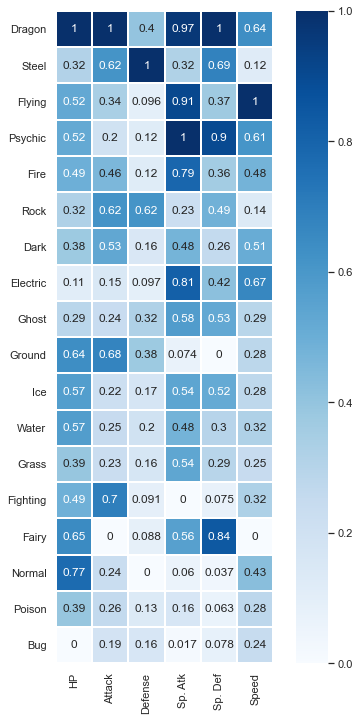

In [38]:
plt.figure(figsize=(8,12))
 
sns.heatmap(scaled_df, cmap='Blues', linewidths = 1, square= True, annot=True)
plt.savefig('pokemon_heatmap.png')

<AxesSubplot:>

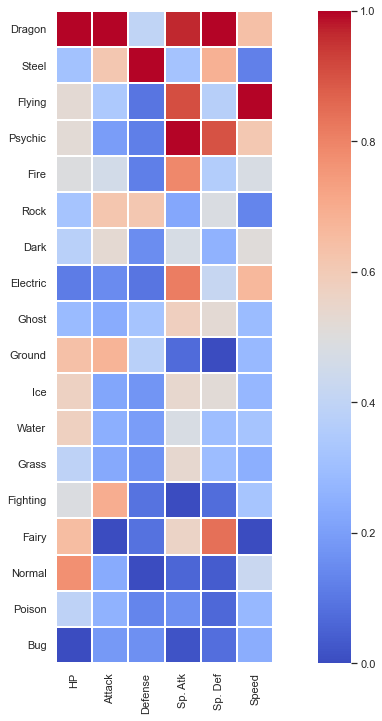

In [15]:
plt.figure(figsize=(16,12))
 
sns.heatmap(scaled_df, cmap='coolwarm', linewidths = 1, square= True)

# Aplicando PCA em com todos os dados

### Separando as categorias, tipo pokemon e atributos

In [16]:
features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

x = pokemon.loc[:, features].values

y = pokemon.loc[:,['Type 1']].values

x = StandardScaler().fit_transform(x)

### Perfomando PCA

In [17]:
from sklearn.decomposition import PCA

pcamodel = PCA(n_components = 5)
principalComponents = pcamodel.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])

In [18]:
finalDf = pd.concat([principalDf, pokemon[['Type 1']]], axis = 1)

In [19]:
finalDf

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,Type 1
0,-1.556375,-0.021482,0.666504,0.184176,-0.403807,Grass
1,-0.362867,-0.050269,0.667913,0.269254,-0.225788,Grass
2,1.280152,-0.062720,0.623914,0.331391,-0.001545,Grass
3,2.620916,0.704263,0.995538,-0.199321,-0.310170,Grass
4,-1.758284,-0.706179,0.411454,-0.268602,-0.168877,Fire
...,...,...,...,...,...,...
795,2.307521,2.303187,1.933811,-0.998507,-0.246770,Rock
796,3.539772,-0.811013,0.655247,-1.821074,-1.360117,Rock
797,2.458216,-0.515882,1.110197,0.818386,-1.192385,Psychic
798,3.530397,-0.951065,0.408284,0.180710,-1.752832,Psychic


In [20]:
explained_variance = pcamodel.explained_variance_ratio_
explained_variance

array([0.45190665, 0.18225358, 0.12979086, 0.12011089, 0.07142337])

### Plotando PCA como heatmap

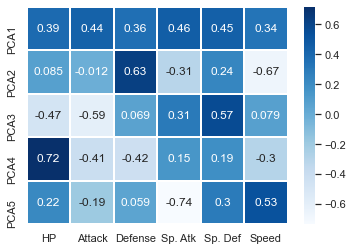

In [21]:
ax = sns.heatmap(pcamodel.components_, cmap='Blues', linewidths = 1, square= True, annot=True,
           yticklabels=[ "PCA"+str(x) for x in range(1,pcamodel.n_components_+1)],
           xticklabels=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'],)
ax.set_aspect("equal")

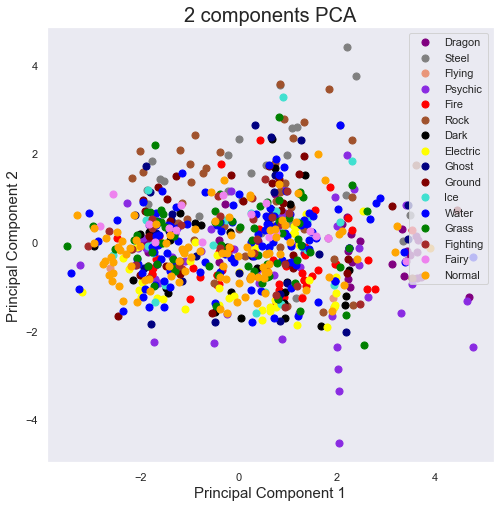

In [22]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 components PCA', fontsize = 20)
targets = ['Dragon', 'Steel', 'Flying', 'Psychic', 'Fire', 'Rock', 'Dark', 'Electric',
            'Ghost', 'Ground', 'Ice', 'Water', 'Grass', 'Fighting', 'Fairy', 'Normal',
            'Poison', 'Bug']
colors = ['purple', 'grey', 'darksalmon', 'blueviolet', 'red', 'sienna', 'black', 'yellow',
            'navy', 'maroon', 'turquoise', 'blue', 'green', 'brown', 'violet', 'orange']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Type 1'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# # Aplicando PCA com os tipos pokemons

### Selecionando os atributos de interesse

In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

df = matrix1.drop(columns = ['Total', '#', 'Generation', 'Legendary'])
df

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Type 1,,,,,,
Dragon,83.312500,112.125000,86.375000,96.843750,88.843750,83.031250
Steel,65.222222,92.703704,126.370370,67.518519,80.629630,55.259259
Flying,70.750000,78.750000,66.250000,94.250000,72.500000,102.500000
Psychic,70.631579,71.456140,67.684211,98.403509,86.280702,81.491228
Fire,69.903846,84.769231,67.769231,88.980769,72.211538,74.442308
Rock,65.363636,92.863636,100.795455,63.340909,75.477273,55.909091
Dark,66.806452,88.387097,70.225806,74.645161,69.516129,76.161290
Electric,59.795455,69.090909,66.295455,90.022727,73.704545,84.500000
Ghost,64.437500,73.781250,81.187500,79.343750,76.468750,64.343750


### Normalizando os dados para ficarem na mesma escala

In [24]:
df_st =  StandardScaler().fit_transform(df)  
pd.DataFrame(df_st, columns=df.columns).head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,2.360970,2.488499,0.683435,1.516743,2.018667,1.112800
1,-0.678840,0.937893,3.262605,-0.476034,0.957420,-1.110549
2,0.250024,-0.176178,-0.614360,1.340486,-0.092911,2.671414
3,0.230125,-0.758523,-0.521873,1.622735,1.687526,0.989510
4,0.107840,0.304401,-0.516390,0.982419,-0.130179,0.425193


### Performando PCA e gerando Heatmap

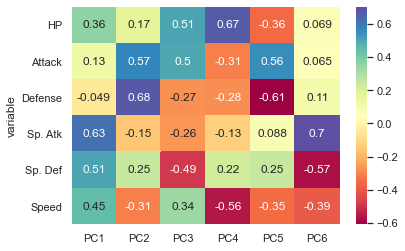

In [46]:
pca_out = PCA().fit(df_st)

pca_out.explained_variance_ratio_

np.cumsum(pca_out.explained_variance_ratio_)

loadings = pca_out.components_
num_pc = pca_out.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.savefig('attributes_heatmap.png')

In [26]:
pca_out.explained_variance_ratio_

array([0.35741618, 0.28551818, 0.18896122, 0.13267062, 0.02440988,
       0.01102393])

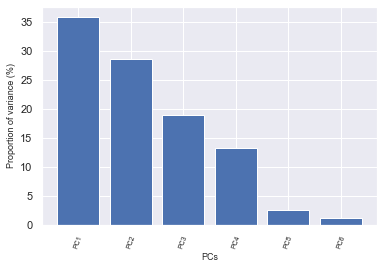

In [27]:
from bioinfokit.visuz import cluster
cluster.screeplot(obj=[pc_list, pca_out.explained_variance_ratio_], show=True)

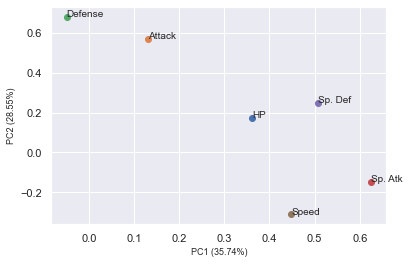

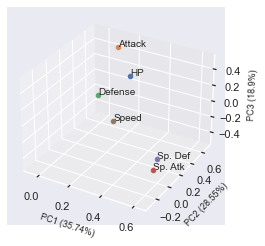

In [28]:
cluster.pcaplot(x=loadings[0], y=loadings[1], labels=df.columns.values, show=True,
    var1=round(pca_out.explained_variance_ratio_[0]*100, 2),
    var2=round(pca_out.explained_variance_ratio_[1]*100, 2))

cluster.pcaplot(x=loadings[0], y=loadings[1], z=loadings[2],  labels=df.columns.values,  show=True,
    var1=round(pca_out.explained_variance_ratio_[0]*100, 2), 
    var2=round(pca_out.explained_variance_ratio_[1]*100, 2), 
    var3=round(pca_out.explained_variance_ratio_[2]*100, 2))

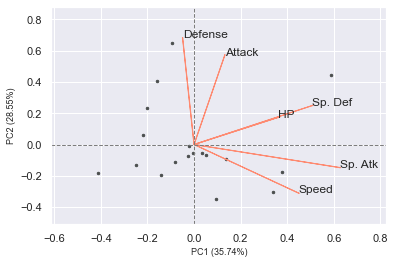

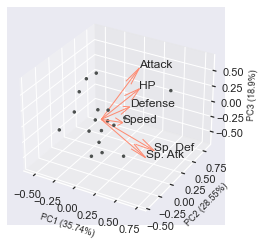

In [29]:
# get PC scores
pca_scores = PCA().fit_transform(df_st)

# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df.columns.values,  show=True,
    var1=round(pca_out.explained_variance_ratio_[0]*100, 2),
    var2=round(pca_out.explained_variance_ratio_[1]*100, 2))
    
# get 3D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df.columns.values,  show=True,
    var1=round(pca_out.explained_variance_ratio_[0]*100, 2), 
    var2=round(pca_out.explained_variance_ratio_[1]*100, 2), 
    var3=round(pca_out.explained_variance_ratio_[2]*100, 2))

# Aplicando Random Forest

### Determinando os valores de classe e atributos

In [30]:
dataset = pokemon.drop(columns = ['Total', '#', 'Generation', 'Legendary', 'Name', 'Type 2'])
dataset

,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Grass,45,49,49,65,65,45
1,Grass,60,62,63,80,80,60
2,Grass,80,82,83,100,100,80
3,Grass,80,100,123,122,120,80
4,Fire,39,52,43,60,50,65
...,...,...,...,...,...,...,...
795,Rock,50,100,150,100,150,50
796,Rock,50,160,110,160,110,110
797,Psychic,80,110,60,150,130,70
798,Psychic,80,160,60,170,130,80


In [31]:
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values

### Dividindo os dados e train e test e treinando o modelo

In [32]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X,
                                                                  y,
                                                                  test_size = 0.3,
                                                                  random_state = 1000)

In [33]:
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_treinamento, y_treinamento)

RandomForestClassifier()

In [34]:
random_forest.feature_importances_

array([0.15993199, 0.17188261, 0.16706502, 0.1770497 , 0.15232639,
       0.17174428])

In [35]:
previsoes = random_forest.predict(X_teste)
confusao = confusion_matrix(y_teste, previsoes)
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_acerto

0.23333333333333334